In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
y=[]
x=[]
with open("processed_train_data.csv", "r") as file:
    content = csv.reader(file)

    next(content)
    for line in content:
        y.append(int(line[1]))#survived
        x1 = int(line[2])     #Pclass
        x2 = int(line[3])     #Sex
        x3 = float(line[4])   #Age ---
        x4 = int(line[5])     #Sibsp
        x5 = int(line[6])     #Parch
        x6 = float(line[7])     #Ticket ---
        x7 = float(line[8])   #Fare ---
        x8 = int(line[9])     #Embarked
        # print(x1,x2,x3,x4,x5,x6,x7,x8)
        x.append(np.array([x1,x2,x3,x4,x5,x6,x7,x8]))
        
    # print(x)

# for line in x:
#     print(line)

In [3]:
mean = np.zeros(3)
variance = np. zeros(3)
sum1=[0,0,0]
sum2 =[0,0,0]

for i in range(len(y)):
    sum1[0] += x[i][2]
    sum1[1] += x[i][5]
    sum1[2] += x[i][6]

    sum2[0] += x[i][2]**2
    sum2[1] += x[i][5]**2
    sum2[2] += x[i][6]**2

mean[0] = sum1[0] / len(y)
mean[1] = sum1[1] / len(y)
mean[2] = sum1[2] / len(y)

sum2[0] /= len(y)
sum2[1] /= len(y)
sum2[2] /= len(y)
for i in range(3):
    variance[i] = sum2[i] - mean[i]**2
    
count = [(2,0),(5,1),(6,2)]

for i in range(len(y)):
    for j,k in count:
        x[i][j] -= mean[k]
    for j,k in count:
        x[i][j] /= variance[k]**(0.5)

# for line in x:
#     print(line.tolist())

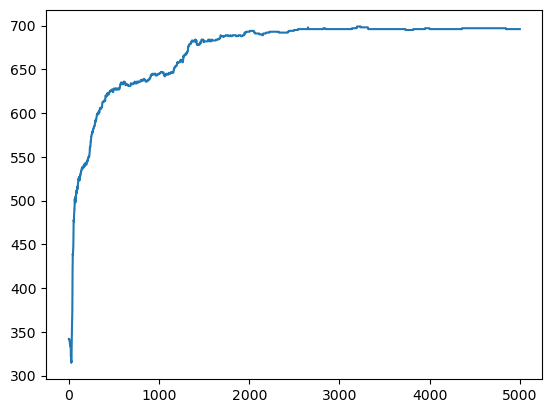

In [4]:
alpha=0.005
beta=5000

theta = np.ones(8)
positive=[]
def g(x):
    seoul = theta @ x
    return seoul
def h(x):
    return 1 / (1 + np.exp(-np.clip(g(x), -500, 500)))
# print(g(x[0]))
for _ in range(beta):
    factor = np.zeros(8)
    for i in range(len(y)):
        for j in range(8):
            factor[j] += alpha*(y[i]- h(x[i]))*x[i][j]
    sum1=0
    for j in range(8):
        theta[j] += alpha*factor[j]
    for i in range(len(x)):
        z=x[i]
        if abs(h(z) - y[i])< 0.5:
            sum1 += 1 
    positive.append(sum1)
    # print(theta)
# print(cost)
plt.plot(positive)
plt.show()

In [5]:
print("positives =",positive[-1])
print("percentage =", 100*positive[-1]/len(x),"%")
print(theta)

positives = 696
percentage = 78.11447811447812 %


In [6]:
p=[]
t=[]
with open("processed_test_data.csv", "r") as file:
    content = csv.reader(file)

    next(content)
    for line in content:
        p.append(int(line[0]))#passengerID
        x1 = int(line[1])     #Pclass
        x2 = int(line[2])     #Sex
        x3 = float(line[3])   #Age ---
        x4 = int(line[4])     #Sibsp
        x5 = int(line[5])     #Parch
        x6 = float(line[6])     #Ticket ---
        x7 = float(line[7])   #Fare ---
        x8 = int(line[8])     #Embarked
        # print(x1,x2,x3,x4,x5,x6,x7,x8)
        t.append(np.array([x1,x2,x3,x4,x5,x6,x7,x8]))
        
output = [['PassengerId', 'Survived']]
for i in range(len(p)):
    z = t[i]
    z[2] = (x[i][2]- mean[0])/(variance[0]**(0.5))
    z[5] = (x[i][5]- mean[1])/(variance[1]**(0.5))
    z[6] = (x[i][6]- mean[2])/(variance[2]**(0.5))

    if h(z) > 0.5 :
        output.append([p[i],1])
    else:
        output.append([p[i],0])

# print(p)

In [7]:
with open("logistic_output.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(output)